*IMPORTANT THINGS TO REMEMBER*
- L1 regularization is also known as Lasso regularization, and try to set the weights of less important features to zero.
- L2 regularization is also known as Ridge regularization, and try to make the weights of less important features small.
- Exists also SGDClassifier and SGDRegressor, which are the stochastic versions of the above models.

### Strengths
- Very fast to train
- Very fast to predict
- Good for very large datasets (Use Stochastic Gradient Descent [sgd] solver, is faster than the default solver)
- Their are easy to understand and interpret
- Their are also often in very large datasets, simply because it's not feasible to train other models.
- If the number of features is much larger than the number of classes performs well.

### Weaknesses
- It is often no entirely clear why coefficients are the way they are.
- In lower dimensional datasets, other models might be more accurate.

# Linear models for regression

In [2]:
import sys
!{sys.executable} -m pip install numpy scipy matplotlib pandas mglearn

In [3]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

w[0]: 0.393906  b: -0.031804


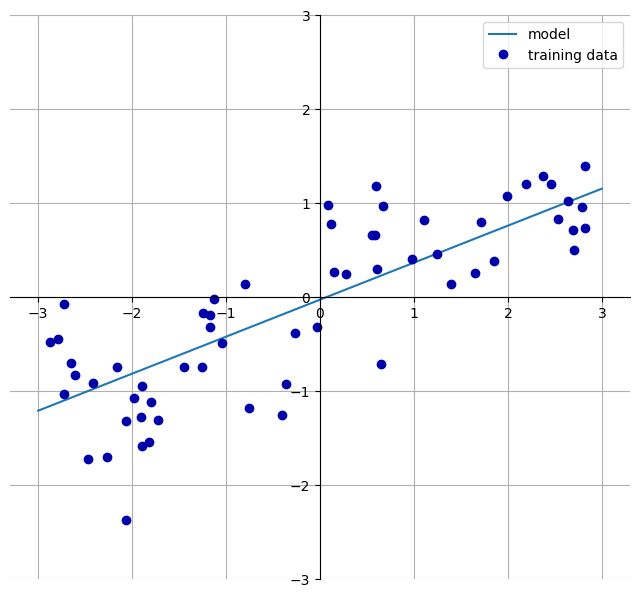

In [4]:
mglearn.plots.plot_linear_regression_wave()

There are many different models that can be used for regression. In this notebook, we will discuss linear models. Linear models are the simplest models for regression. They are called linear models because they are linear in the parameters. This means that the prediction is a linear function of the parameters.

The general form of a linear model is:

$$
y = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_p x_p + b
$$

where $y$ is the prediction, $w_0, w_1, \ldots, w_p$ are the parameters of the model, and $x_1, x_2, \ldots, x_p$ are the features, and $b$ is the bias. The goal of training a linear model is to find the values of the parameters $w_0, w_1, \ldots, w_p$ that minimize the error between the predictions of the model and the true values of the target variable.

There are many different linear models that can be used for regression. In this notebook, we will discuss some of the most common linear models, including:

- Linear regression
- Ridge regression
- Lasso regression

## Linear regression

Linear regression finds there parameters $w$ and $b$ that minize the mean squared error between the predictions of the model and the true values of the target variable. The mean squared error is defined as:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where $y_i$ is the true value of the target variable, $\hat{y}_i$ is the prediction of the model, and $n$ is the number of samples in the dataset.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [6]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


The lr.coef_ attribute of the LinearRegression object contains the coefficients of the linear model as a numpy array, and the lr.intercept_ attribute contains the intercept.

In [7]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


With lower dimensionality data, linear regression tends to underfit the model, but when higher dimensionality data is used, linear regression tends to overfit the model. This is because linear regression tries to fit a straight line to the data, which may not be the best fit for higher dimensionality data, but it converts into a powerful with higher dimensionality data.

In [8]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


We can see clearly overfitting. One of the common alternatives to linear regression is ridge regression.

## Ridge regression

Also to minimize the mean squared error, ridge regression adds a penalty term to the loss function. It tries to have the coefficients as small as possible. This technique is called regularization, it means explicitly restricting the model to avoid overfitting. The particular kind used by ridge regression is called L2 regularization.

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


As we can see, the training score is lower than linea regression, but it generalizes better given a better score in test data.

We have to tune the hyperparameter alpha, which controls the strength of the regularization. The higher the value of alpha, the more the coefficients are pushed towards zero. By default, the value of alpha is 1.0.

In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Having a high alpha value, the model will be more robust to the noise in the data, but it will be less flexible. It is similar than linear regression.

In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


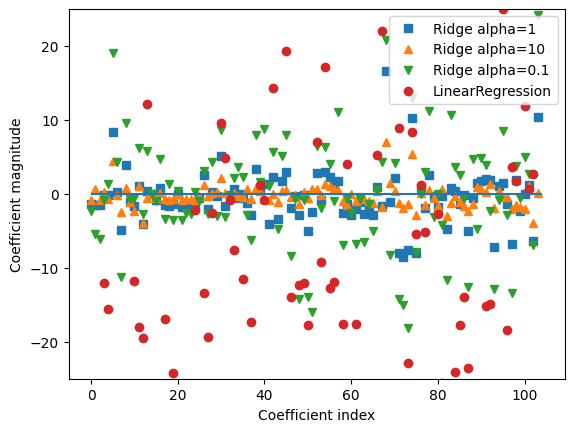

In [12]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Another way to undesrtand the influence of regularization is to fix a value of alpha and vary the amount of training data.

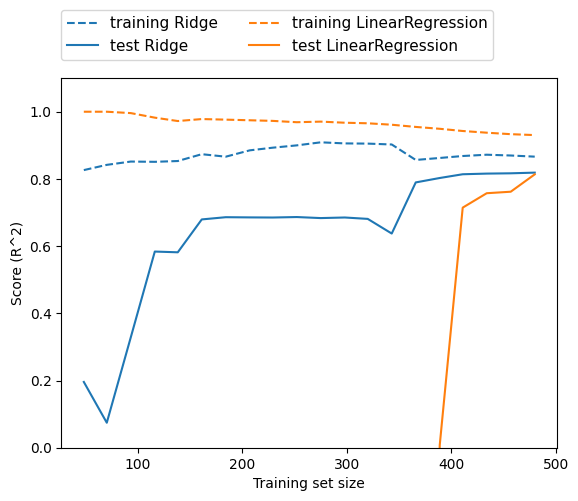

In [13]:
mglearn.plots.plot_ridge_n_samples()

This technique is called learning curve. We can conclude with the less data ridge regression is better than linear regression, because with less data, linear regression doesnt learn anything, but when we have more data, linear regression catches up with ridge regression.

## Lasso

This alternative also adds a penalty term to the loss function, but it uses L1 regularization. This means some features are entirely ignored by the model (The coefficients are zero). This made the model more interpretable, because it is easier to see which features are important and which are not.

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


The model is underfitted, then we must have to try with a less alpha value, because we are taking only 4 of 104 features. Lasso also has a hyperparameter alpha, which controls the strength of the regularization. By default, the value of alpha is 1.0. And we also have to tune the parameter max_iter, which is the maximum number of iterations to run.

In [15]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


A lower alpha allowed us to fit a more complex model, but we have to be careful because it can lead to overfitting because we are removing the efect of regularization. With obtain a result similar to linear regression.

In [16]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Again we can plot the results of the differents models.

Text(0, 0.5, 'Coefficient magnitude')

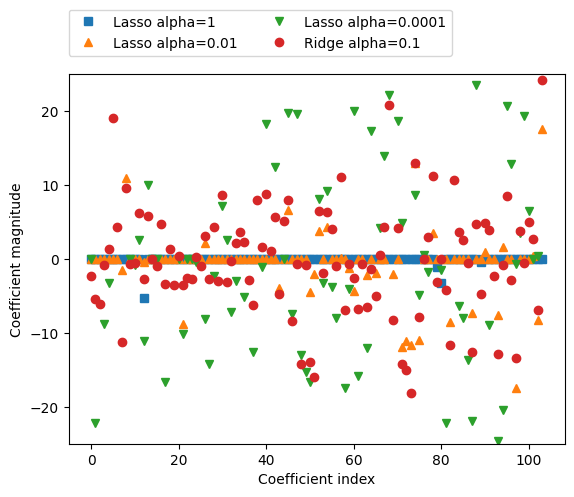

In [17]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

As we can see using Lasso with alpha 1 most of the features are zero, but with alpha 0.1 we have more features.
Ridge regression is usually the first option, but if we have a model where you know that only a few features are important, Lasso is a good option.

As extra, we can use ElasticNet of scikit-learn, which is a combination of Lasso and Ridge regression. It adds both L1 and L2 regularization to the loss function. It has two hyperparameters, alpha and l1_ratio. The alpha hyperparameter controls the strength of the regularization, and the l1_ratio hyperparameter controls the ratio of L1 regularization to L2 regularization. By default, the value of alpha is 1.0, and the value of l1_ratio is 0.5.

# Linear models for classification

Linear classification models are models that can be used to classify data into two or more classes, it depends on the number of classes. In this notebook, we will discuss some of the most common linear classification models, including:
- Logistic regression
- Linear Support Vector Machine (SVM)

## Logistic regression and Linear Support Vector Machine (SVM)

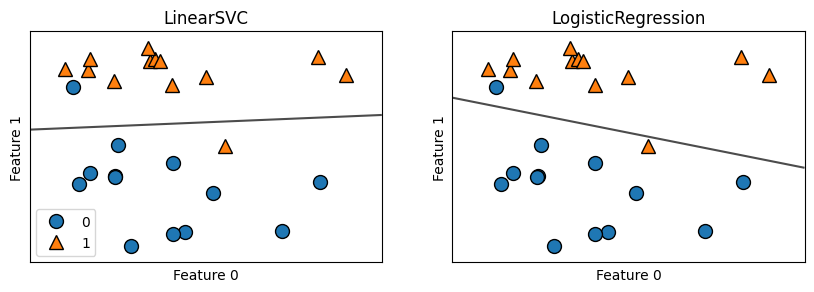

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

These models come up with similar decision boundaries, by default both models use L2 regularization. The parameter that make the trade-off between the smoothness of the decision boundary and the classification error is called C. The higher the value of C, the more the model will try to fit the training data, and the lower the value of C, the more the model will try to generalize.

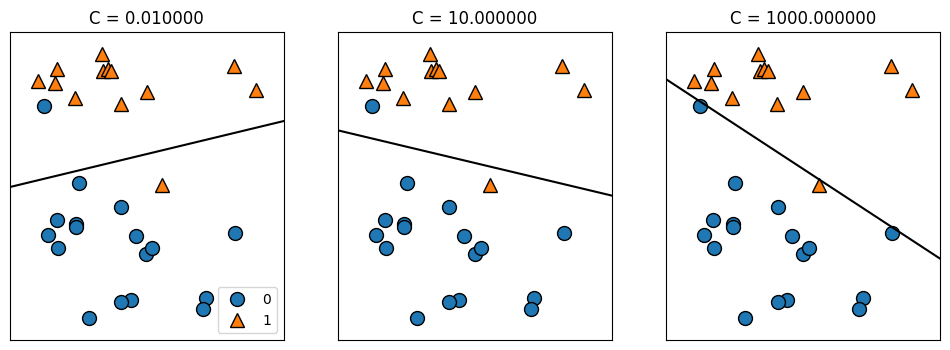

In [19]:
mglearn.plots.plot_linear_svc_regularization()

As the linear regression models, the linear classification models are not good at all in low dimensionality data, but they are powerful in high dimensionality data.

Now let's analize the logistic regression on the breast cancer dataset.

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


How the training and test scores are very similar we can conclude that the model is probably underfitted. We can try to increase the value of C to make the model more complex.

In [21]:
logreg100 = LogisticRegression(C=100, max_iter=1000000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.979
Test set score: 0.965


Now we can see that the test score is higher than the previus model, that means that our model can be more complex and it should perform better.

Just for investigation porpuses, lets try with a smaller value of C.

In [22]:
logreg001 = LogisticRegression(C=0.01, max_iter=1000000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


As expected the model is underfitted, because the model is too simple.

Let's compare them.

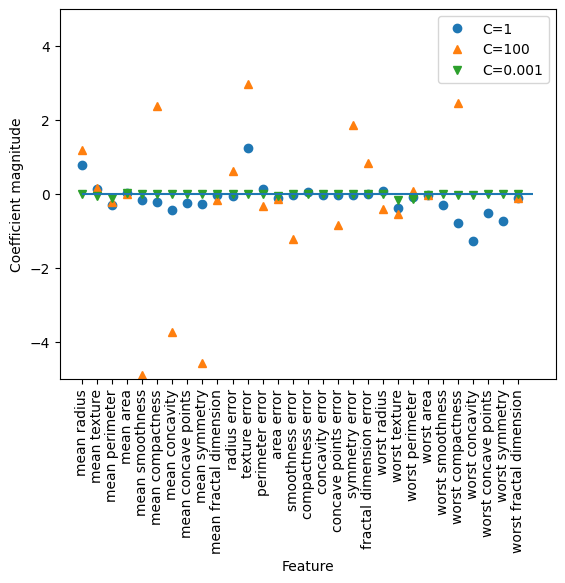

In [23]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we want more interpretable model we could use L1 regularization.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


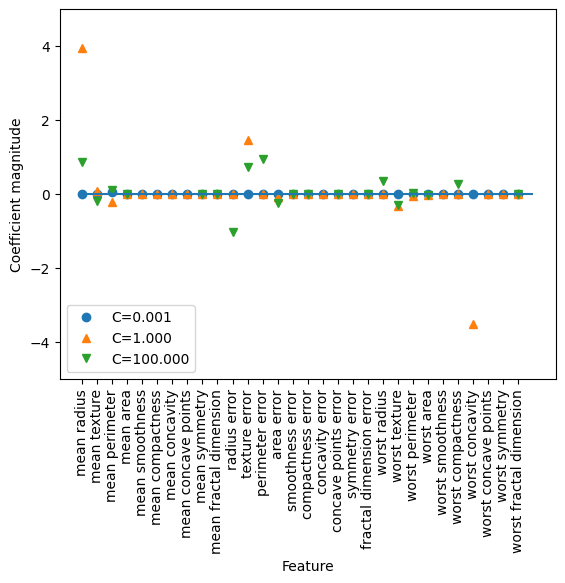

In [24]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear', max_iter=1000000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

## Linear models for multiclass classification

To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest scores on this single class "wins", and this class label is returned as the prediction.

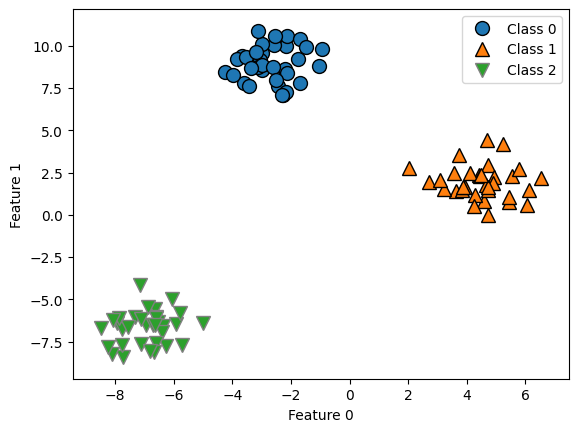

In [25]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [26]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


coef_.shape will have the shape of (n_classes, n_features), and intercept_.shape will have the shape of (n_classes,).
That means that for each row we have the information for each class and, each column holds coefficient value for a specific feature.
The intercept_ value is the bias for each class.

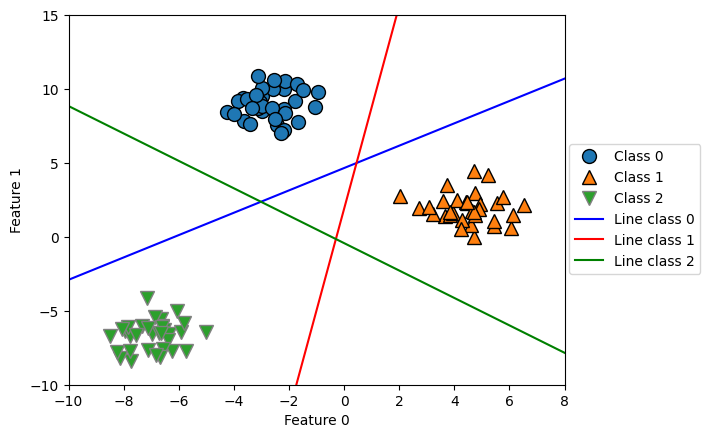

In [27]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                   ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Each line separate the own class from the rest of the classes.

In the triangle generate in the middle, for classify a point, we have to calculate the distance to each line, and the point will be classified to the class with less distance.

We can see the prediction areas.

Text(0, 0.5, 'Feature 1')

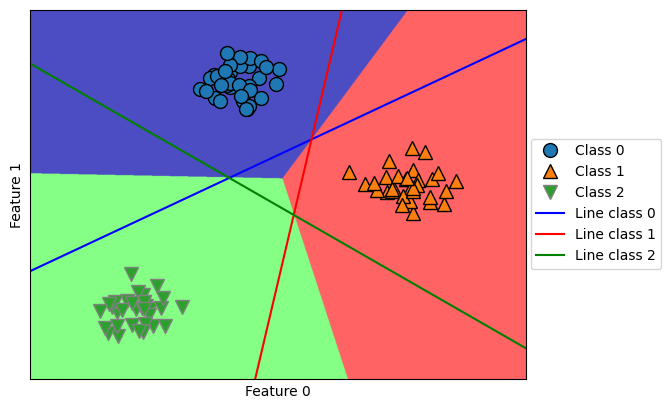

In [28]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                      ['b', 'r', 'g']):
     plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Example method chaining

The code returns self so we can do method chaining.

In [ ]:
logreg = LogisticRegression(max_iter=1000000).fit(X_train, y_train)

Another common usage.

In [ ]:
logreg = LogisticRegression(max_iter=1000000)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

The following pattern is not recommended becuase it is hard to read and the model is not stored in a variable so we can't use it later.

In [ ]:
y_pred = LogisticRegression(max_iter=1000000).fit(X_train, y_train).predict(X_test)